#**How to Train YOLO11 Object Detection Model on a Custom Dataset**

Data: https://universe.roboflow.com/project-uyrxf/ppe_detection-v1x3l/dataset/1#

In [1]:
!nvidia-smi

Tue Mar 25 12:47:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   63C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**Step 01 # Install the Ultralytics Package**

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

**Step 02 # Import All the Requried Libraries**

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.5/112.6 GB disk)


In [2]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [52]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="t9Fifmqpwdnu52S3tCKl")
project = rf.workspace("sanskriti-hbam6").project("threat-in-retail-1olc4")
version = project.version(5)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov11 in progress : 85.0%
Version export complete for yolov11 format



Extracting Dataset Version Zip to threat-in-retail-5 in yolov11:: 100%|██████████| 3650/3650 [00:02<00:00, 1242.18it/s]


In [53]:
dataset.location

'/content/threat-in-retail-5'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [54]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=100 imgsz=640 batch = 64

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/threat-in-retail-5/data.yaml, epochs=100, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

**Step # 05 Examine Training Results**

In [55]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [56]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/train2/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1742907068.7cece412a784.1609.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1440.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1441.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1442.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


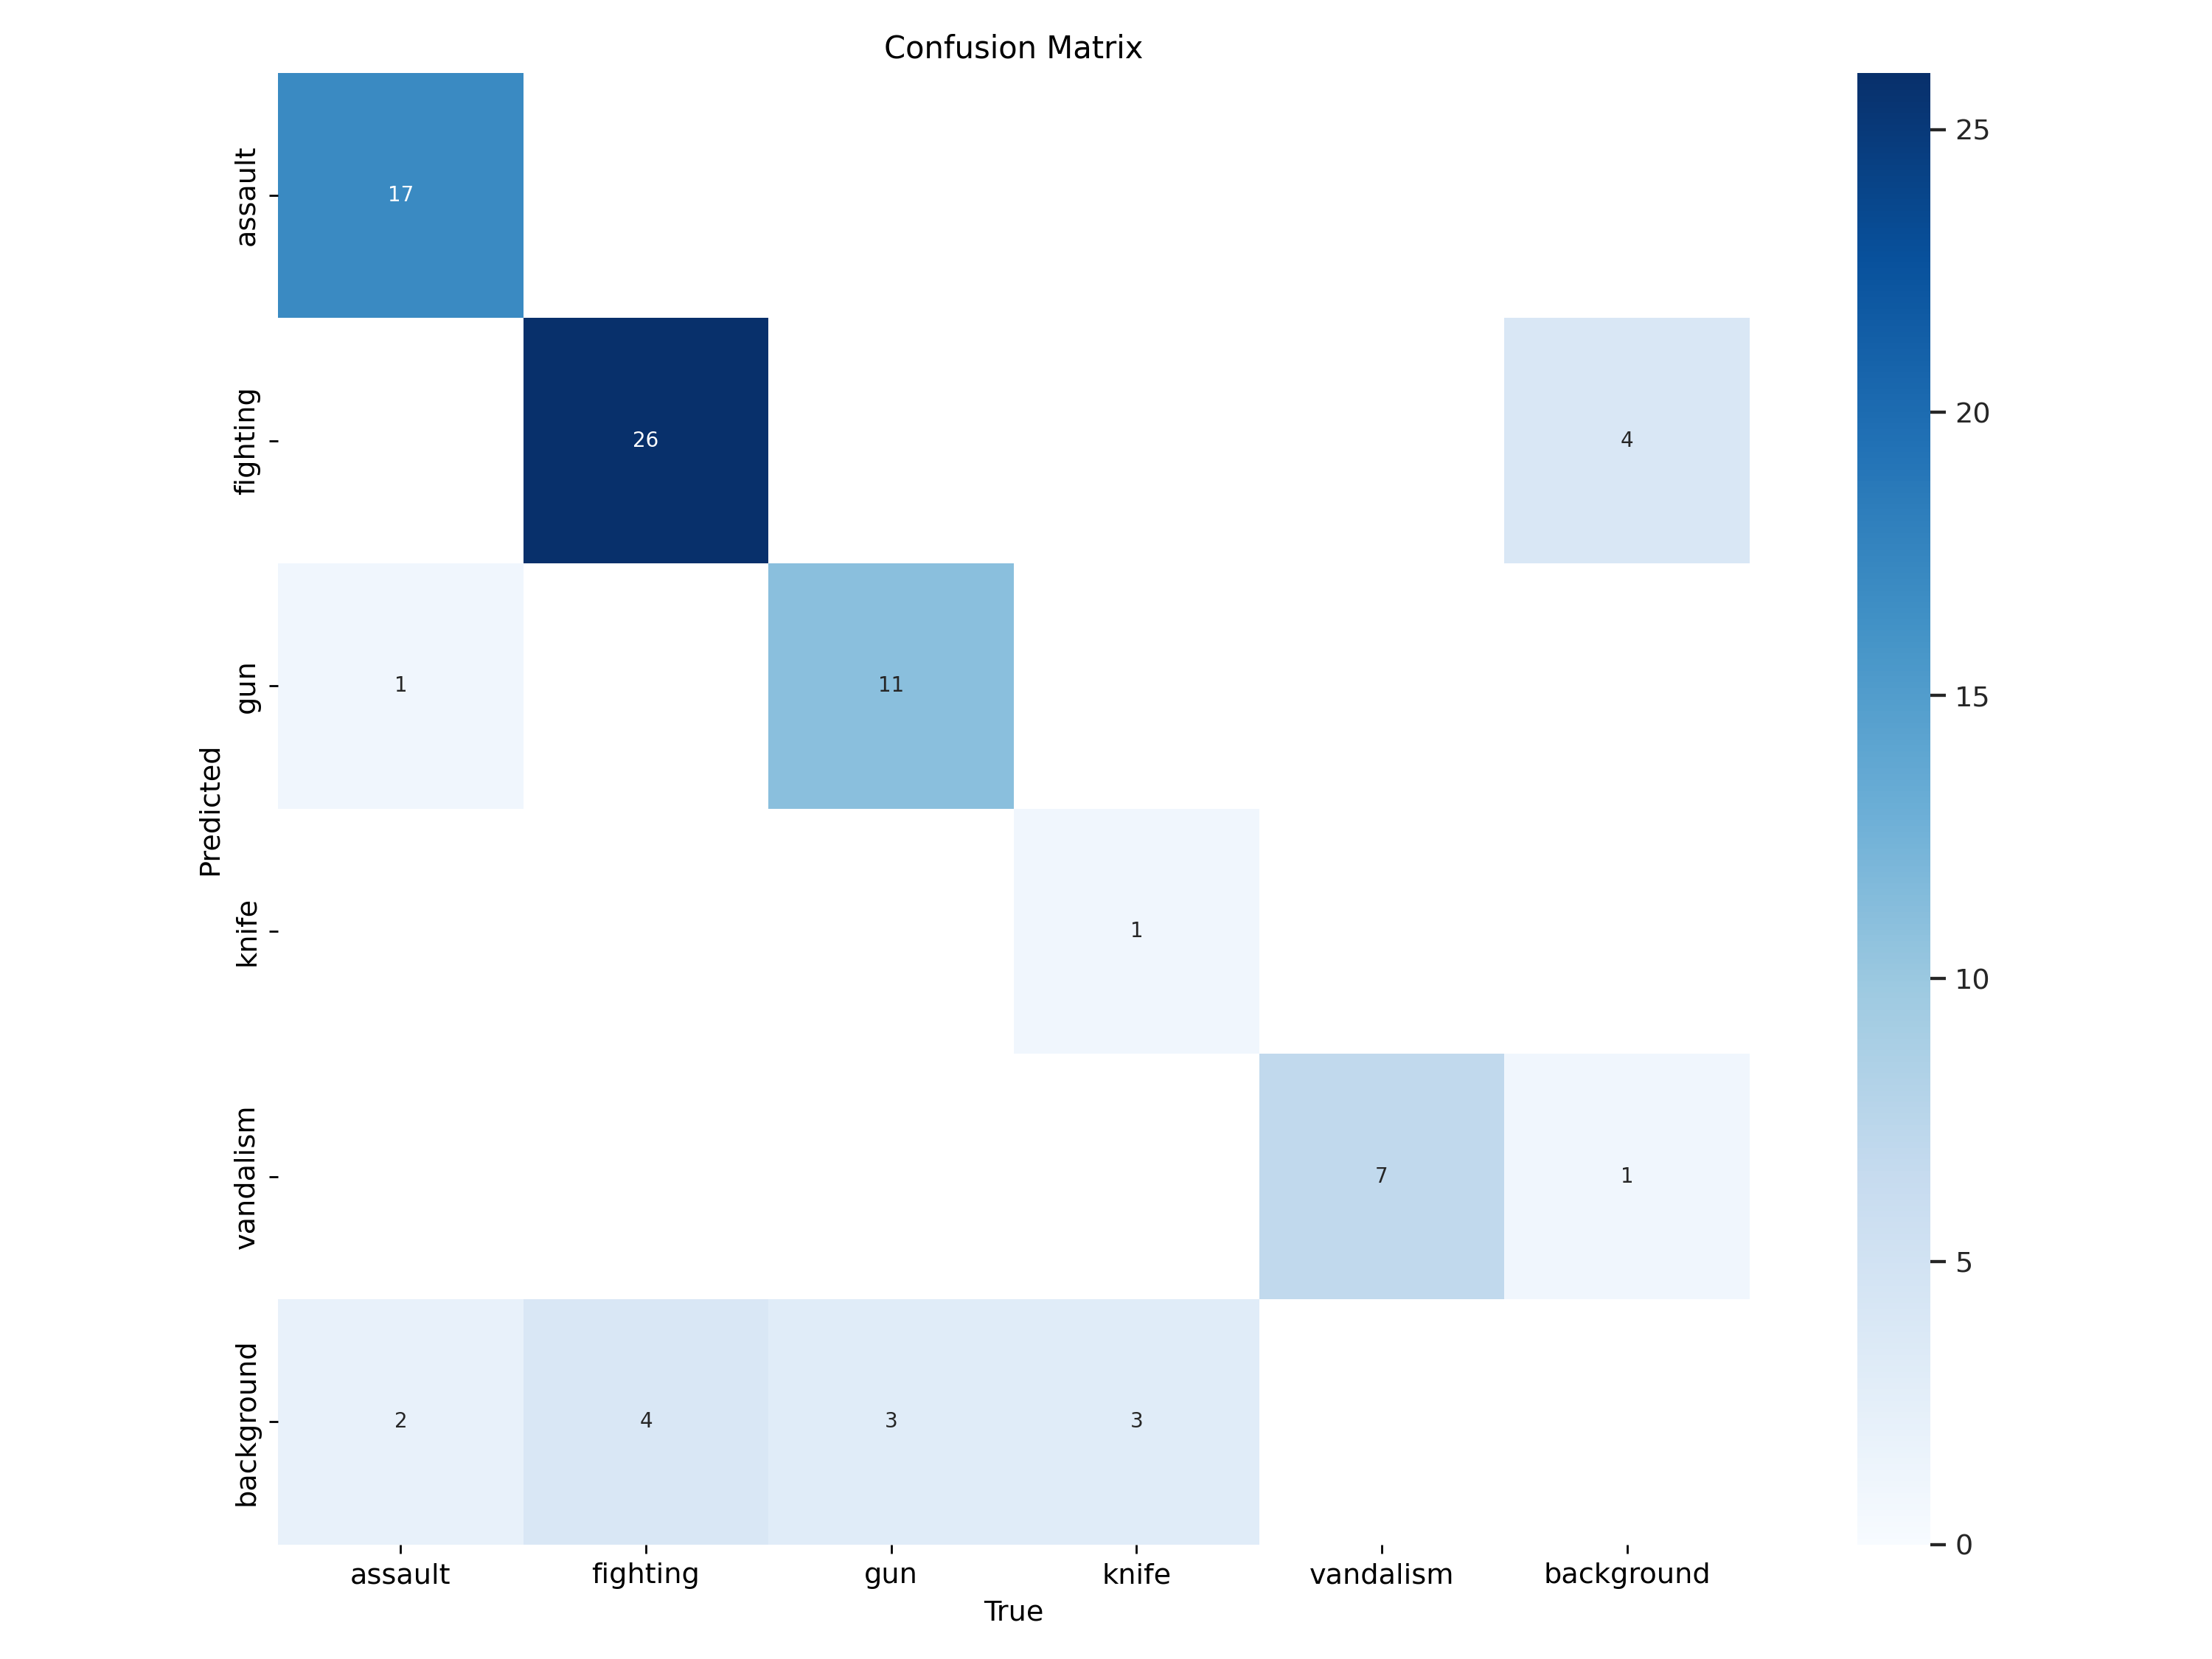

In [44]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=1000)

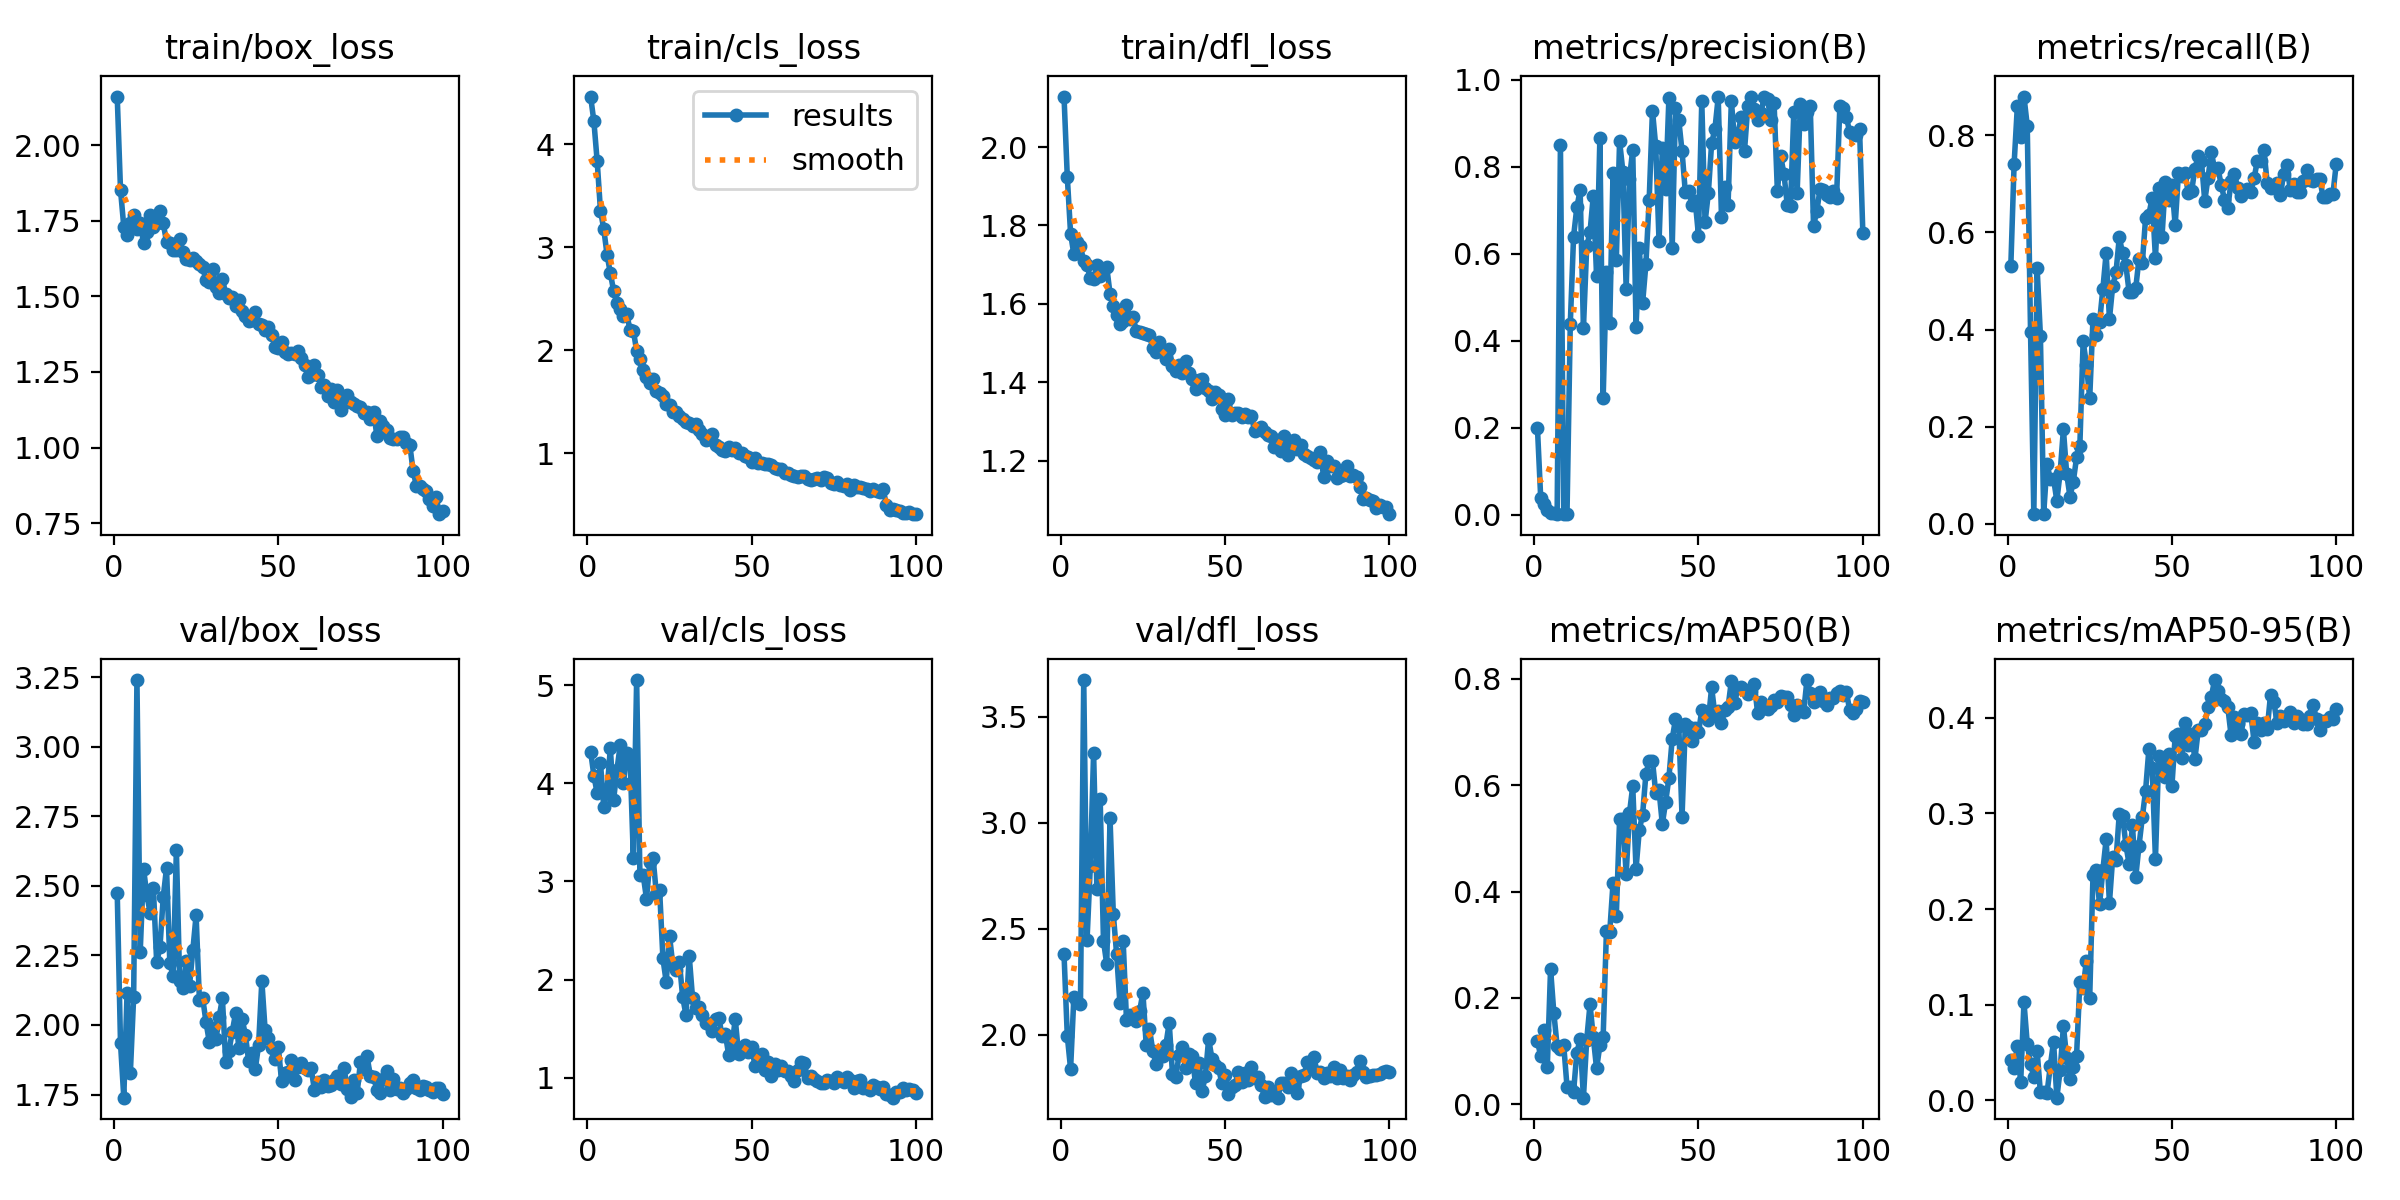

In [46]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train4/results.png', width=1000)

In [47]:
!pip install supervision

In [57]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

ds.classes

['assault', 'fighting', 'gun', 'knife', 'vandalism']

In [61]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f'/{HOME}/runs/detect/train5/weights/best.pt')

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [62]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f'/{HOME}/runs/detect/train5/weights/best.pt')

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [63]:
print("mAP 50:95", map.map50_95)
print("mAP 50", map.map50)
print("mAP 75", map.map75)

mAP 50:95 0.45279160773220184
mAP 50 0.7623762376237624
mAP 75 0.540011786892975


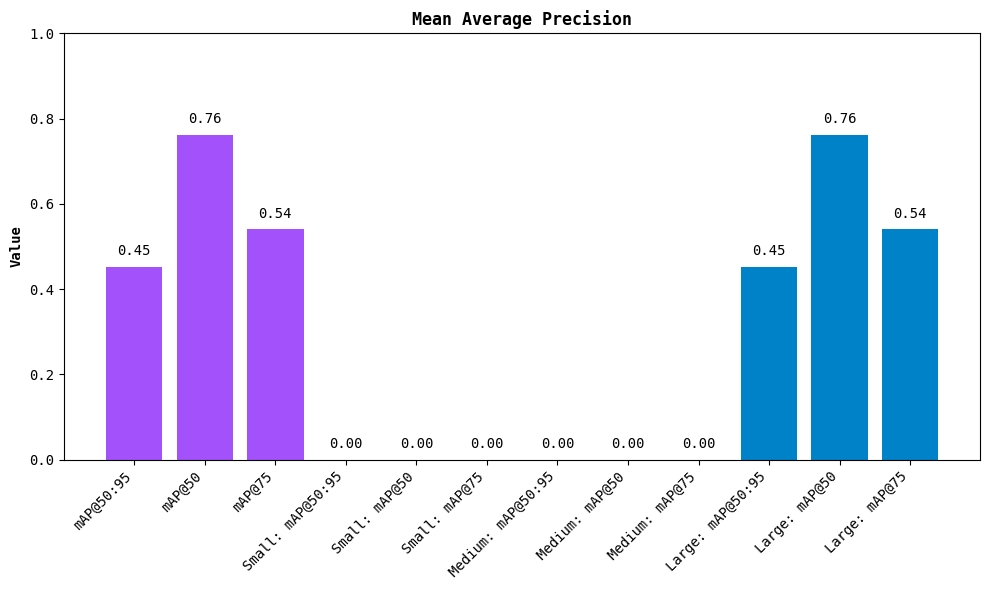

In [64]:
map.plot()

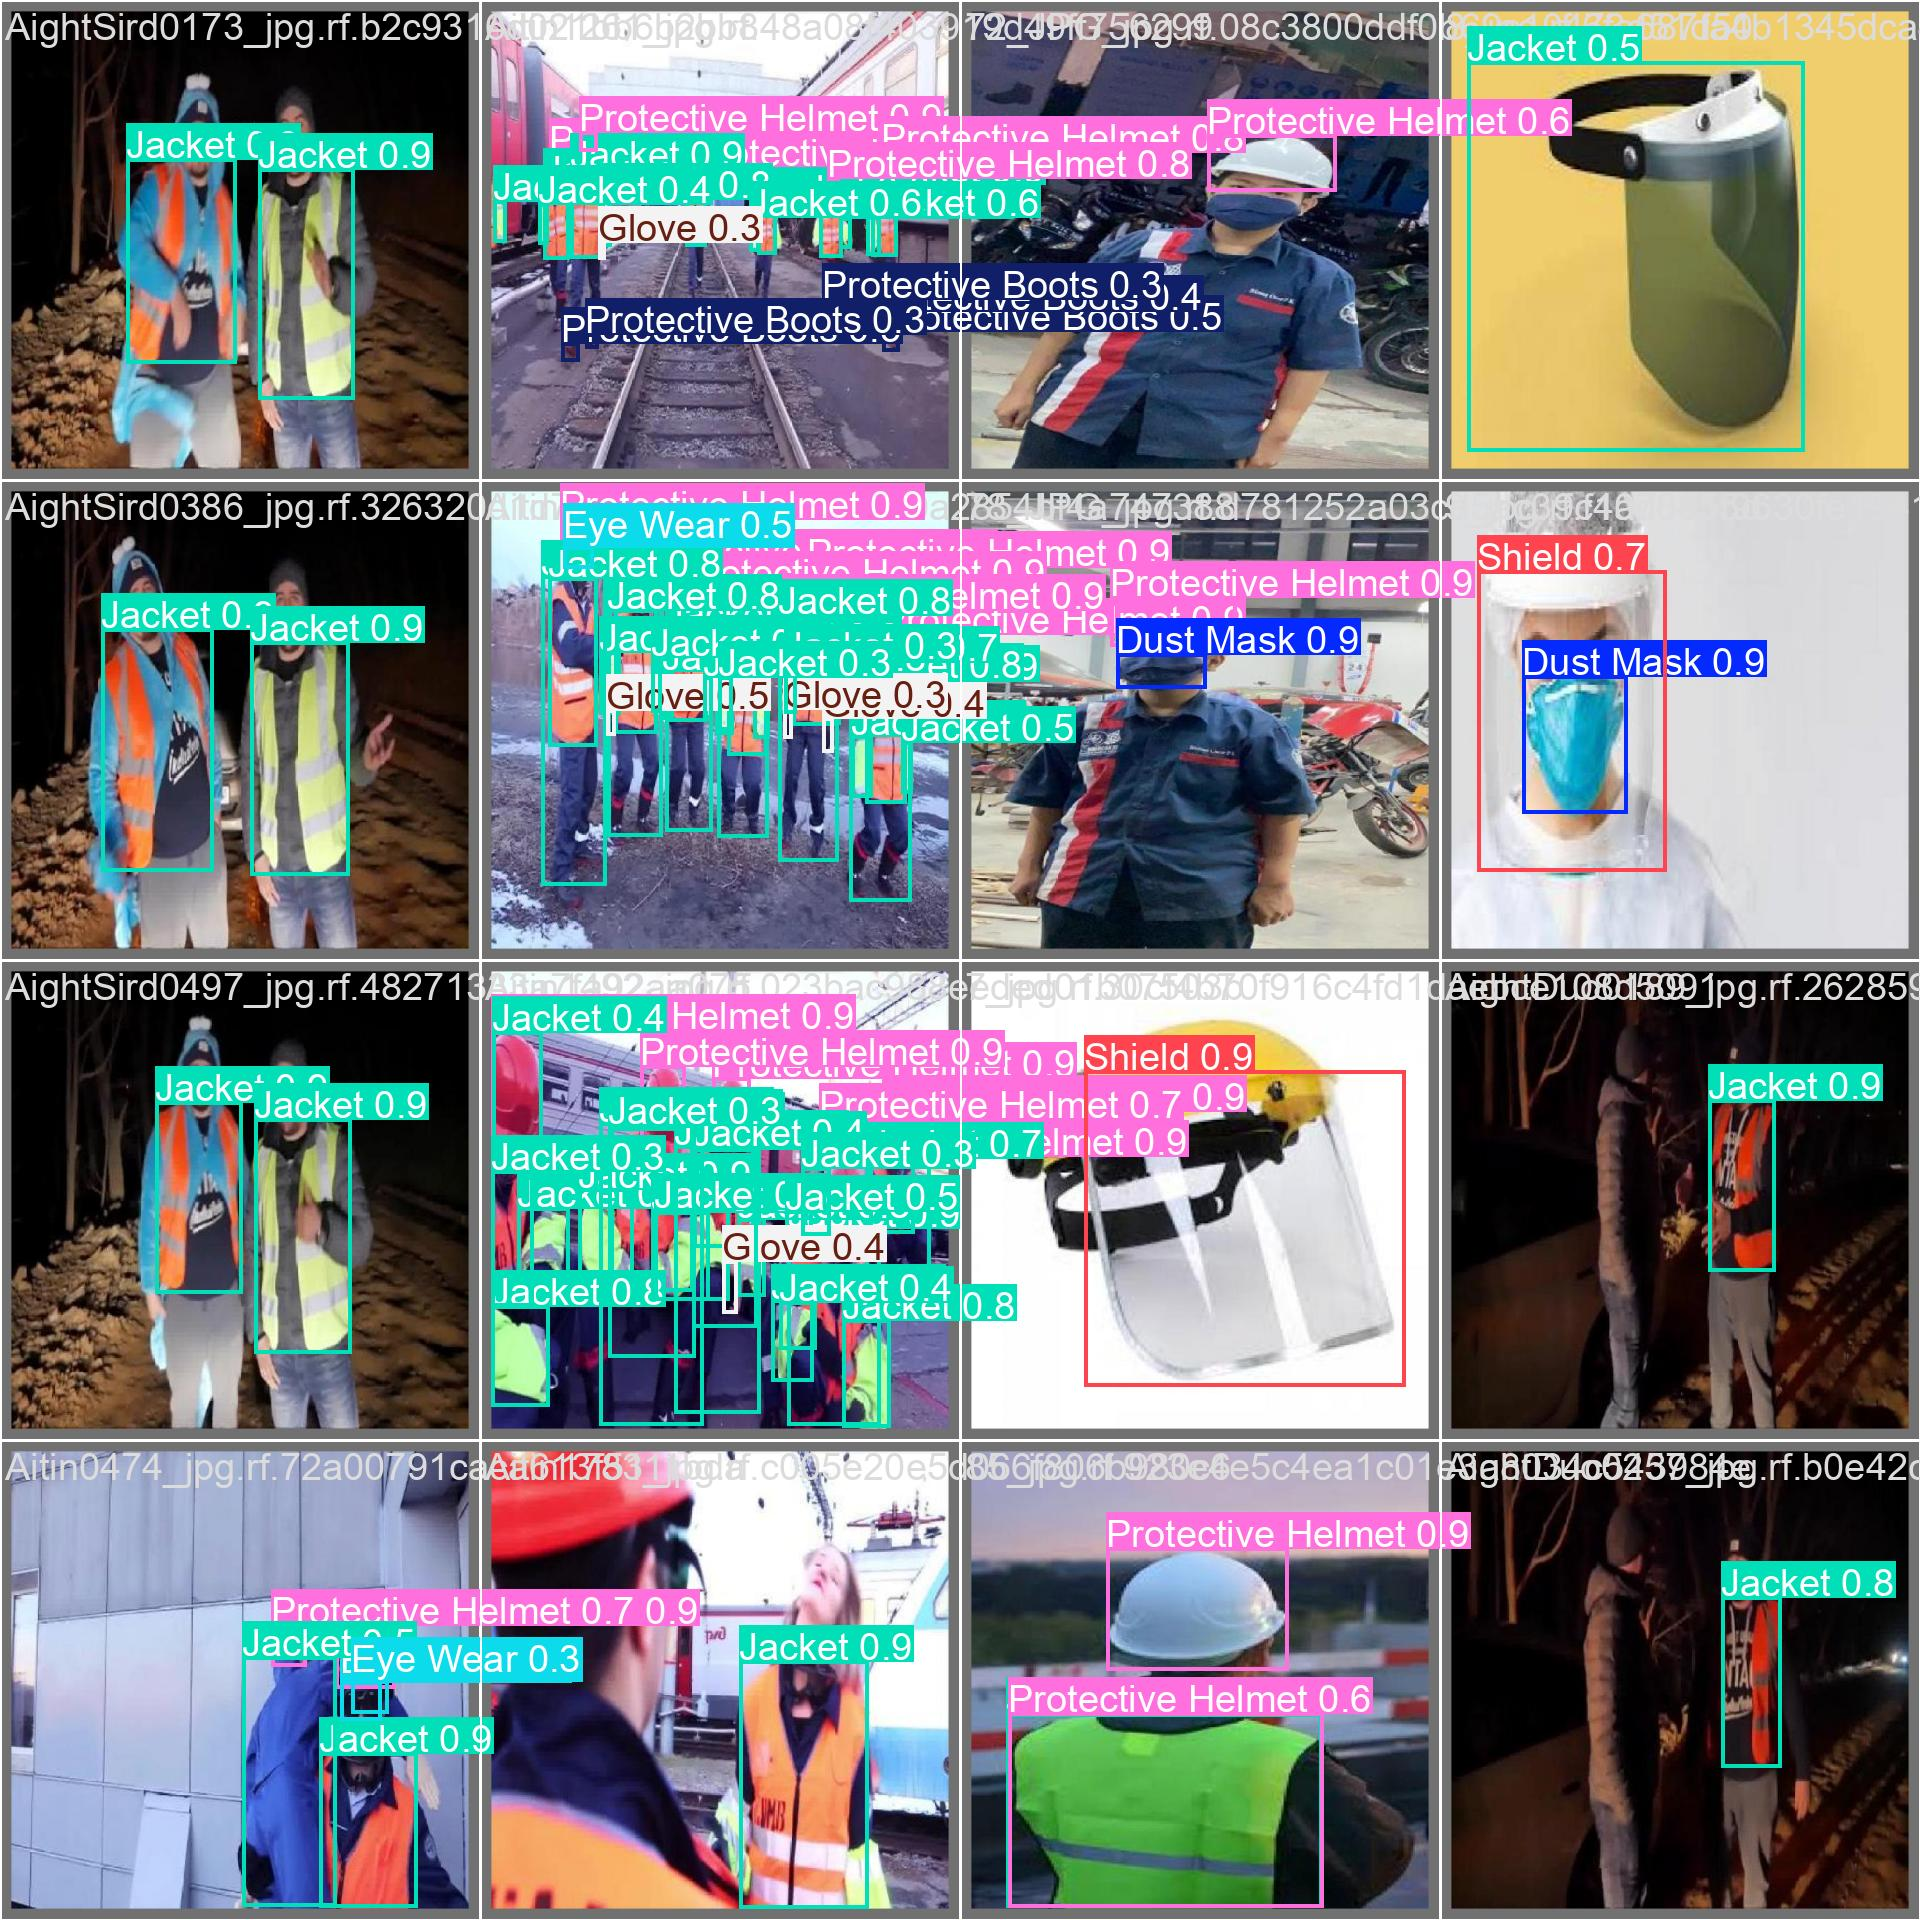

In [ ]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

**Step # 07  Validate Fine-Tuned Model**

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/PPE_Detection-1/valid/labels.cache... 649 images, 0 backgrounds, 0 corrupt: 100% 649/649 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 41/41 [00:07<00:00,  5.71it/s]
                   all        649       3126      0.889      0.839      0.893      0.625
             Dust Mask        301        311      0.969      0.918      0.956      0.656
              Eye Wear        148        149      0.854      0.745      0.807      0.457
                 Glove        354        644      0.945      0.887      0.947      0.671
                Jacket        364        607      0.892      0.896      0.938      0.723
      Protective Boots        299        610      0.957       0.96      0.981      0.702
     Protective Helmet        413        780   

**Step # 08 Inference with Custom Model on Images**

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/325 /content/PPE_Detection-1/test/images/000446_jpg.rf.5ea7ca6bde68eb546e8c3dcd1c0fd6d5.jpg: 640x640 1 Dust Mask, 1 Protective Helmet, 11.3ms
image 2/325 /content/PPE_Detection-1/test/images/20220721_161946_jpg.rf.4ff1543edb0405f57fb590d5dcb284b6.jpg: 640x640 (no detections), 10.7ms
image 3/325 /content/PPE_Detection-1/test/images/20220721_162015_jpg.rf.ee54ba7d79baa065a7cfc4666f0fd024.jpg: 640x640 1 Dust Mask, 10.6ms
image 4/325 /content/PPE_Detection-1/test/images/20220721_162036_jpg.rf.9d32aa23505a54eff5555d9b667bb597.jpg: 640x640 1 Dust Mask, 9.7ms
image 5/325 /content/PPE_Detection-1/test/images/20220721_162308_jpg.rf.2f8d1ad4716998b9fc123d94dce4d8b0.jpg: 640x640 1 Dust Mask, 4 Eye Wears, 9.1ms
image 6/325 /content/PPE_Detection-1/test/images/20220721_162435_jpg.rf.f36f898409158c65a23c0604535ff366.jpg: 640x640 

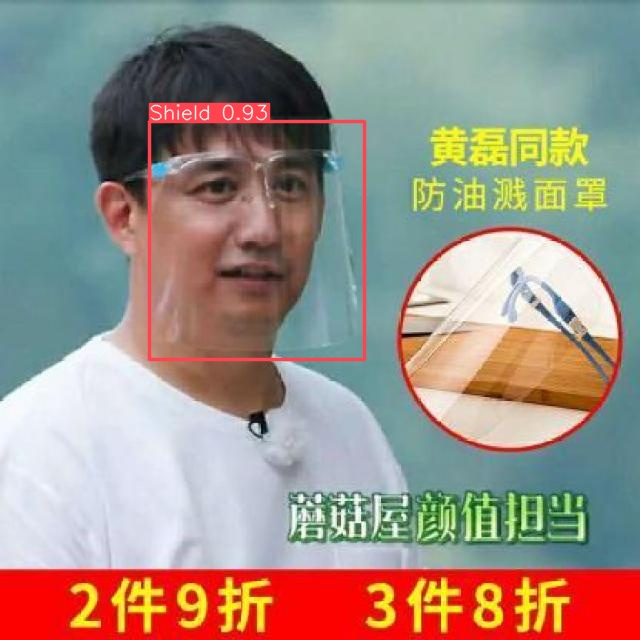

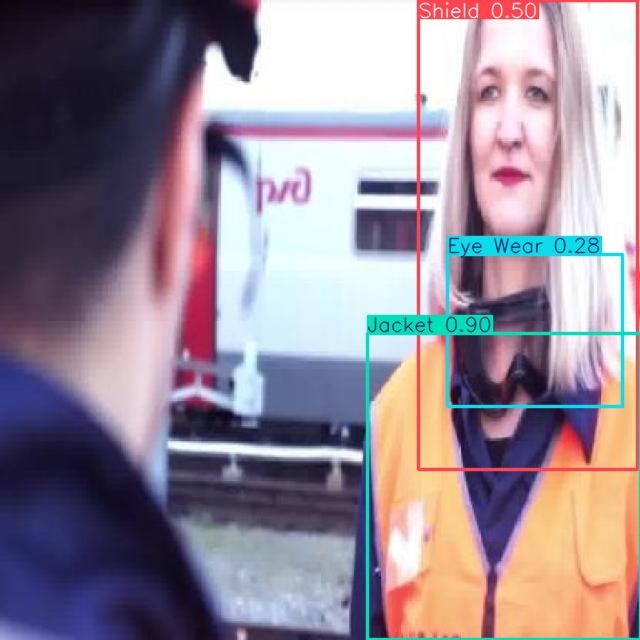

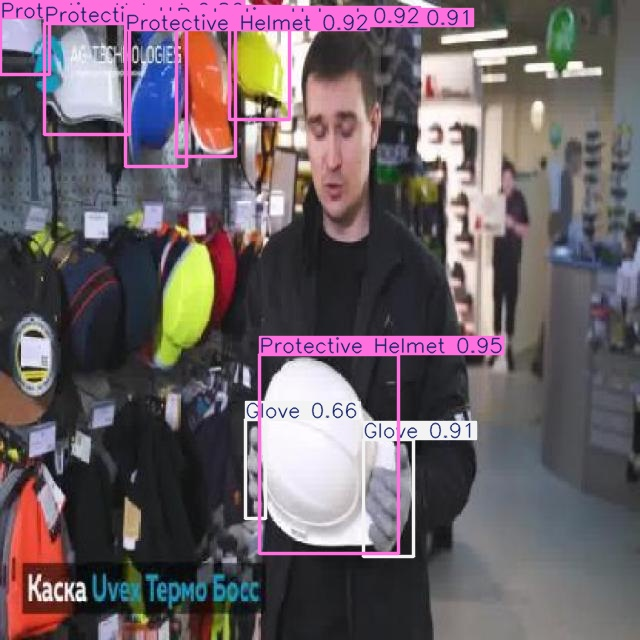

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!gdown "https://drive.google.com/uc?id=1ACZp9gmtjEdIY-SHp8K0xdR0D8Gjd3j3&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1ACZp9gmtjEdIY-SHp8K0xdR0D8Gjd3j3&confirm=t
To: /content/image2.jpg
100% 77.7k/77.7k [00:00<00:00, 129MB/s]


In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source=image2.jpg save=True

Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/image2.jpg: 640x640 6 Jackets, 4 Protective Bootss, 2 Protective Helmets, 10.2ms
Speed: 2.5ms preprocess, 10.2ms inference, 558.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


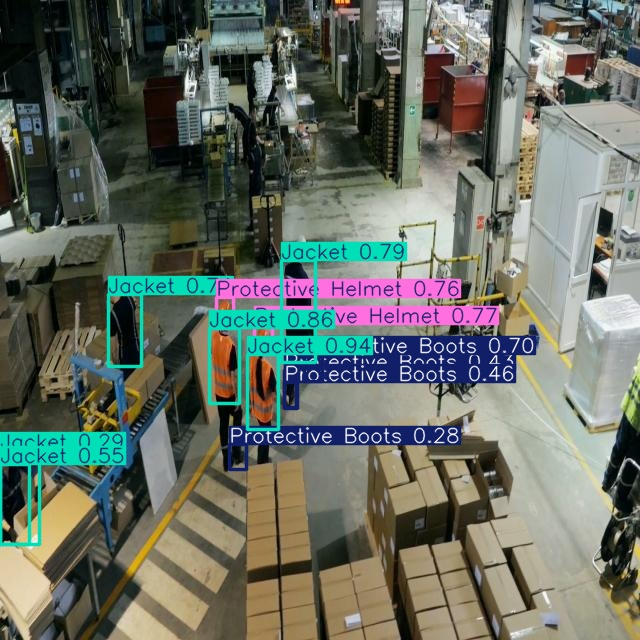

In [ ]:
Image("/content/runs/detect/predict2/image2.jpg", width=600)

**Step # 08 Inference with Custom Model on Videos**

In [ ]:
!gdown "https://drive.google.com/uc?id=1Nyl18zr7zOJHh8uHtSic3dsJSY4LI_t-&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Nyl18zr7zOJHh8uHtSic3dsJSY4LI_t-&confirm=t
To: /content/PPE_Part1.mp4
100% 14.2M/14.2M [00:00<00:00, 90.9MB/s]


In [ ]:
!gdown "https://drive.google.com/uc?id=1SxcrDanPAr-PZfJjWBxoa2t8lUSM2dZn&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1SxcrDanPAr-PZfJjWBxoa2t8lUSM2dZn&confirm=t
To: /content/PPE_Part2.mp4
100% 11.1M/11.1M [00:00<00:00, 57.3MB/s]


In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="PPE_Part1.mp4" save=True

Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/310) /content/PPE_Part1.mp4: 384x640 4 Jackets, 1 Protective Helmet, 48.5ms
video 1/1 (frame 2/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 2 Protective Helmets, 12.5ms
video 1/1 (frame 3/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 2 Protective Helmets, 9.5ms
video 1/1 (frame 4/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 2 Protective Helmets, 9.2ms
video 1/1 (frame 5/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 2 Protective Helmets, 9.9ms
video 1/1 (frame 6/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 2 Protective Helmets, 9.6ms
video 1/1 (frame 7/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 3 Protective Helmets, 8.8ms
video 1/1 (frame 8/310) /content/PPE_Part1.mp4: 384x640 2 Jackets, 2 Protective Helmets, 9.3ms
video 1/1 (frame 9/310) /content/PPE_Part1.mp4: 384x640 5 Jackets, 2 Prote

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict3/PPE_Part1.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)